### Importing necessary libraries

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Loading and preprocessing MNIST dataset

In [ ]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')
X_train /= 255
X_valid /= 255
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

**굵은 텍스트**### Define residual block
**Parameters:**
*   x: input
*   ch: output channel size
*   k: kernel size

**Return:**
*   final output

**The diagram of residual block:**

![[2023-1 AI] HW2.png](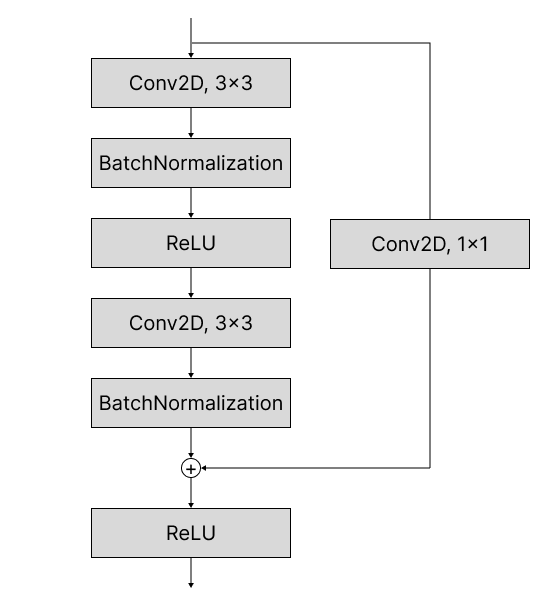)

In [ ]:
def ResidualBlock(x, ch, k):
  ### Please fill here
  # Hint: use layers.Add() to merge skip connection
  shortcut = x

  x = layers.Conv2D(ch, k, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.Conv2D(ch, k, padding='same')(x)
  x = layers.BatchNormalization()(x)

  if x.shape[-1]!=shortcut.shape[-1]:
    shortcut = layers.Conv2D(ch, 1, 1, padding = 'same')(shortcut)
  x = layers.Add()([x, shortcut])
  x = layers.ReLU()(x)

  return x

### Define the whole network
**The diagram of ResNet7:**

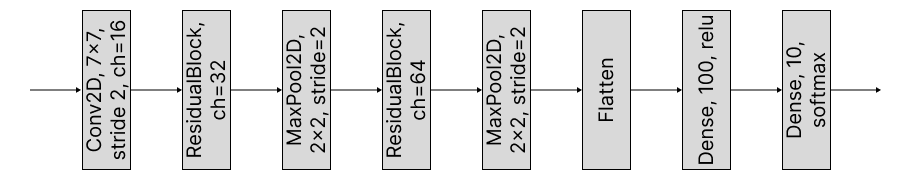

In [ ]:
def ResNet7():
  ### Please fill here
  a = layers.Input(shape=(28,28,1))
  x= layers.Conv2D(filters=16, kernel_size=7, strides=2)(a)

  x= ResidualBlock(x,32,3)

  x = layers.MaxPooling2D((2, 2), strides=2)(x)

  x= ResidualBlock(x,64,3)

  x = layers.MaxPooling2D((2, 2), strides=2)(x)

  x= layers.Flatten()(x)

  x = layers.Dense(100, activation='relu')(x)

  x = layers.Dense(10, activation='softmax')(x)

  model = models.Model(inputs=a, outputs=x)

  model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
  return model

### Model instantiation

In [ ]:
model = ResNet7()

### Training loop

In [ ]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 256,
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 7s 11ms/step - loss: 0.2066 - accuracy: 0.9390 - val_loss: 0.3803 - val_accuracy: 0.8948
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0456 - accuracy: 0.9858 - val_loss: 0.0793 - val_accuracy: 0.9741
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0374 - val_accuracy: 0.9885
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0202 - accuracy: 0.9938 - val_loss: 0.0383 - val_accuracy: 0.9877
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0319 - val_accuracy: 0.9912
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0114 - accuracy: 0.9966 - val_loss: 0.0322 - val_accuracy: 0.9909
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0662 - val_accuracy: 0.9807
Epoch

### Plot training curve

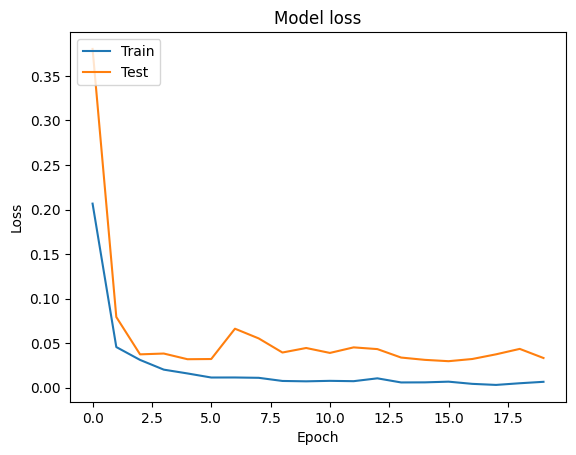

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Question 1. Report training curve (Epoch vs. Loss) and final validation accuracy without any regularization method.

#### Answer:
without any regularization method, As epochs progress, the train loss consistently decreases, but the validation loss shows a fluctuating and unstable trend rather than steadily decreasing after the first epoch.

### Question 2. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout applied (dropout rate: 0.3). Explain how you applied dropout on your code.

#### Answer:
I insert Dropout code between Dense(100) and softmax.
You can see that the validation accuracy is slightly higher when dropout is not applied.





In [ ]:
def ResidualBlock(x, ch, k):
  ### Please fill here
  # Hint: use layers.Add() to merge skip connection
  shortcut = x

  x = layers.Conv2D(ch, k, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.Conv2D(ch, k, padding='same')(x)
  x = layers.BatchNormalization()(x)

  if x.shape[-1]!=shortcut.shape[-1]:
    shortcut = layers.Conv2D(ch, 1, 1, padding = 'same')(shortcut)
  x = layers.Add()([x, shortcut])
  x = layers.ReLU()(x)

  return x

In [ ]:

def ResNet7():
  ### Please fill here
  a = layers.Input(shape=(28,28,1))
  x= layers.Conv2D(filters=16, kernel_size=7, strides=2)(a)


  x= ResidualBlock(x,32,3)

  x = layers.MaxPooling2D((2, 2), strides=2)(x)

  x= ResidualBlock(x,64,3)

  x = layers.MaxPooling2D((2, 2), strides=2)(x)

  x= layers.Flatten()(x)

  x = layers.Dense(100, activation='relu')(x)

  x = layers.Dropout(0.3)(x) # Apply dropout after the dense layer

  x = layers.Dense(10, activation='softmax')(x)

  model = models.Model(inputs=a, outputs=x)

  model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
  return model

In [ ]:
model = ResNet7()

history = model.fit(
    X_train,
    y_train,
    batch_size = 256,
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 6s 9ms/step - loss: 0.2961 - accuracy: 0.9117 - val_loss: 0.2537 - val_accuracy: 0.9629
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0706 - accuracy: 0.9789 - val_loss: 0.0508 - val_accuracy: 0.9836
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0460 - accuracy: 0.9863 - val_loss: 0.0331 - val_accuracy: 0.9900
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0357 - accuracy: 0.9894 - val_loss: 0.0434 - val_accuracy: 0.9869
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0384 - val_accuracy: 0.9873
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0336 - val_accuracy: 0.9886
Epoch 7/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0474 - val_accuracy: 0.9871
Epoch

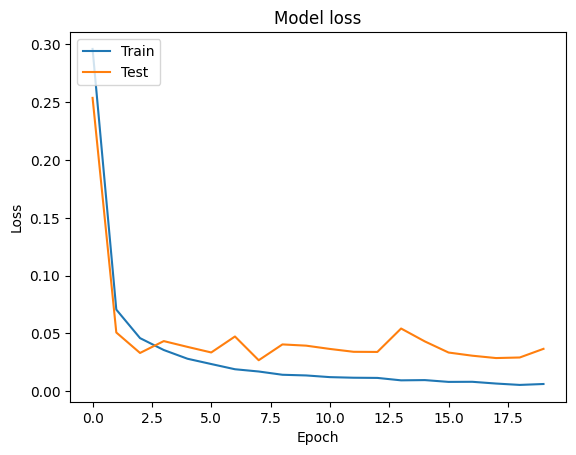

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Question 3. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout and weight decay applied (L2 regularization with 0.001). Explain how you applied weight decay on your code.

#### Answer:
I implemented weight decay on both the convolutional and dense layers. Although the performance is similar, you can see from the graph that the variability of the validation loss has decreased.








In [ ]:
def ResidualBlock(x, ch, k):
  ### Please fill here
  # Hint: use layers.Add() to merge skip connection
  shortcut = x

  x = layers.Conv2D(ch, k, padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)
  x = layers.Conv2D(ch, k, padding='same', kernel_regularizer=regularizers.l2(0.001))(x)
  x = layers.BatchNormalization()(x)

  if x.shape[-1]!=shortcut.shape[-1]:
    shortcut = layers.Conv2D(ch, 1, 1, padding = 'same', kernel_regularizer=regularizers.l2(0.001))(shortcut)
  x = layers.Add()([x, shortcut])
  x = layers.ReLU()(x)

  return x

In [ ]:
from keras import regularizers

def ResNet7():
    a = layers.Input(shape=(28,28,1))

    x = layers.Conv2D(filters=16, kernel_size=7, strides=2,
                      kernel_regularizer=regularizers.l2(0.001))(a)

    x = ResidualBlock(x, 32, 3)

    x = layers.MaxPooling2D((2, 2), strides=2)(x)

    x = ResidualBlock(x, 64, 3)

    x = layers.MaxPooling2D((2, 2), strides=2)(x)

    x = layers.Flatten()(x)

    x = layers.Dense(100, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=a, outputs=x)

    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    return model


In [ ]:
model = ResNet7()

history = model.fit(
    X_train,
    y_train,
    batch_size = 256,
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 6s 12ms/step - loss: 0.5900 - accuracy: 0.9201 - val_loss: 1.3868 - val_accuracy: 0.6135
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.3263 - accuracy: 0.9799 - val_loss: 0.2777 - val_accuracy: 0.9866
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 0.2495 - accuracy: 0.9858 - val_loss: 0.2321 - val_accuracy: 0.9839
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 0.2018 - accuracy: 0.9870 - val_loss: 0.1797 - val_accuracy: 0.9887
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1632 - accuracy: 0.9890 - val_loss: 0.1860 - val_accuracy: 0.9777
Epoch 6/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1344 - accuracy: 0.9910 - val_loss: 0.1331 - val_accuracy: 0.9867
Epoch 7/20
235/235 [==============================] - 2s 11ms/step - loss: 0.1140 - accuracy: 0.9916 - val_loss: 0.1350 - val_accuracy: 0.9811
Epo

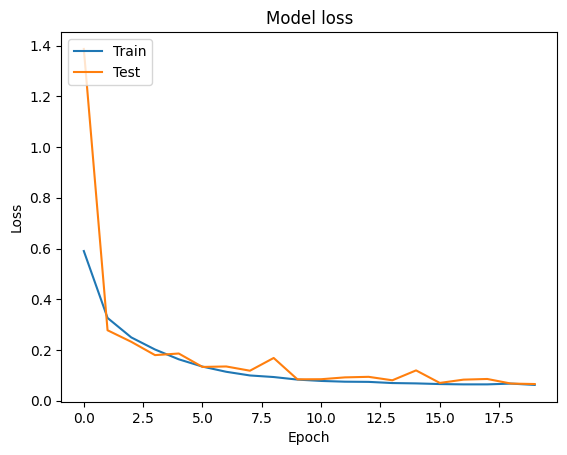

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()